In [1]:
from Train_STAGATE import train_STAGATE
from utils import mclust_R, Stats_Spatial_Net, Cal_Spatial_Net
import squidpy as sq
import scanpy as sc

/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sq.datasets.visium_hne_adata(path='../visium_hne.h5ad')

In [3]:
Cal_Spatial_Net(adata, k_cutoff=6, model='KNN') 
adata = train_STAGATE(adata, n_epochs=10)
adata.obsm['STAGATE']

------Calculating spatial graph...
The graph contains 16128 edges, 2688 cells.
6.0000 neighbors per cell on average.
Size of Input:  (2688, 4000)


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


array([[  8.724201 ,  -4.7398734, -10.909191 , ...,   8.954798 ,
          6.758242 ,  -8.298901 ],
       [  9.530561 ,  -6.1216755, -10.668289 , ...,   9.951522 ,
          7.9711967,  -7.4357896],
       [  9.859754 ,  -6.3012323, -11.075405 , ...,   9.702141 ,
          7.1144304,  -6.519884 ],
       ...,
       [ 10.1234665,  -6.1511483, -12.102456 , ...,   9.858748 ,
          6.868623 ,  -7.1703324],
       [ 10.4918165,  -4.2707014, -10.84415  , ...,  10.388393 ,
          7.1739883,  -6.046509 ],
       [ 10.754246 ,  -6.0034375, -11.780779 , ...,  11.201239 ,
          8.971463 ,  -7.8098083]], dtype=float32)

fitting ...
  |======================================================================| 100%


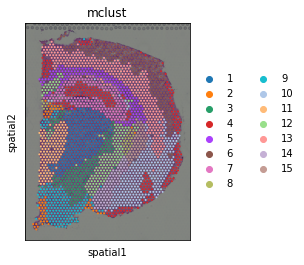

In [5]:
adata = mclust_R(adata, 15)
sc.pl.spatial(adata, color=['mclust'])

In [15]:
adata = sc.read_visium(path='../data/151507')

/home/ubuntu/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
